In [4]:
!pip install neuralforecast
!pip install torchinfo
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.6/516.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.5.0
    Uninstalling termcolor-2.5.0:
      Successfully uninstalled termcolor-2.5.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


INFO:lightning_fabric.utilities.seed:Seed set to 1
[codecarbon INFO @ 00:54:42] [setup] RAM Tracking...
[codecarbon INFO @ 00:54:42] [setup] CPU Tracking...
[codecarbon WARNING @ 00:54:42] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 00:54:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:54:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 00:54:43] [setup] GPU Tracking...
[codecarbon INFO @ 00:54:43] No GPU found.
[codecarbon INFO @ 00:54:43] >>> Tracker's metadata:
[codecarbon INFO @ 00:54:43]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:54:43]   Python version: 3.10.12
[codecarbon INFO @ 00:54:43]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 00:54:43]   Available RAM : 12.675 GB
[codecarbon INFO 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

[codecarbon INFO @ 00:55:14] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 00:55:14] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:55:14] 0.000394 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:55:29] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 00:55:29] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:55:29] 0.000591 kWh of electricity used since the beginning.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=50` reached.
[codecarbon INFO @ 00:55:35] Energy consumed for RAM : 0.000068 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 00:55:35] Energy consumed for all CPUs : 0.000606 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:55:35] 0.000674 kWh of electricity used since the beginning.
/usr/local/lib/python3.10/dist-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightnin

Predicting: |          | 0/? [00:00<?, ?it/s]

Evaluasi Model NHITS:
Mean Absolute Error (MAE): 282.38
Mean Squared Error (MSE): 101810.78
Root Mean Squared Error (RMSE): 319.08

Stabilitas:
Rata-rata Residual: 278.35
Standar Deviasi Residual: 155.99
Residual Maksimal: 451.74
Residual Minimal: -29.67

Konvergensi:
Nilai loss minimum tercapai pada epoch ke-48 dengan nilai loss: 369.63

Efisiensi:
Waktu Pelatihan Model: 51.34 detik
Penggunaan Memori Selama Pelatihan: 531.01 MB
Amount of CO2 Produced: 0.0004 kg


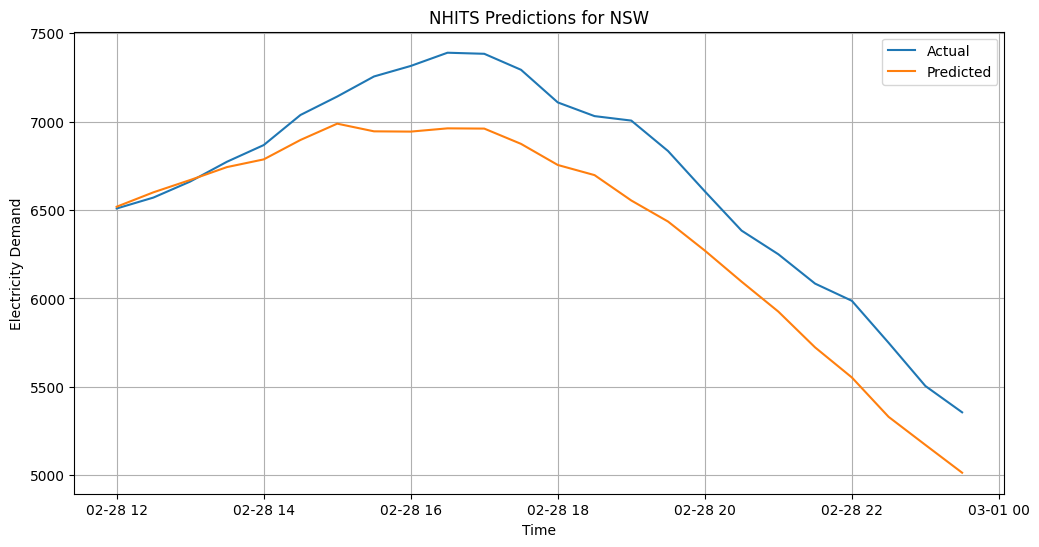

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, LSTM
from neuralforecast.losses.pytorch import MAE
import time
import psutil
import os
from codecarbon import EmissionsTracker

# Set environment variable to suppress future warning
os.environ['NIXTLA_ID_AS_COL'] = '1'

# Inisialisasi model
window_size = 48
horizon = 24
model_name = 'NHITS'  # Pilihan: 'NBEATS', 'NHITS', 'LSTM'
loss_function = MAE()  # Fungsi loss
epochs = 50
batch_size = 32

# Fungsi untuk membaca file TSF dari URL
def read_tsf_from_url(url):
    import requests
    response = requests.get(url)
    lines = response.text.splitlines()

    series_data = []
    reading_data = False

    for line in lines:
        if line.strip() == "" or line.startswith("#"):
            continue

        if line.startswith("@data"):
            reading_data = True
            continue

        if reading_data:
            series_data.append(line.strip())

    return series_data

# Parsing time series data
def parse_series_data(series_data):
    parsed_data = []
    state_names = []
    start_times = []

    for row in series_data:
        parts = row.split(":")
        if len(parts) >= 4:
            state_names.append(parts[1])  # Extract the state name
            start_times.append(pd.Timestamp(parts[2]))  # Extract start timestamp
            time_series = list(map(float, parts[3].split(","))) if "," in parts[3] else []
            parsed_data.append(time_series)

    return state_names, start_times, parsed_data


# Fungsi untuk mempersiapkan dataset menjadi format NeuralForecast
def prepare_dataset(time_series, state_name, start_time):
    timestamps = pd.date_range(start=start_time, periods=len(time_series), freq="30min")
    df = pd.DataFrame({"ds": timestamps, "y": time_series})
    df["unique_id"] = state_name
    return df

# URL raw file dari GitHub
url = "https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/5b204ef45db85a9ff4e283dd74941dbc117ad287/dataset/australian_electricity_demand_dataset.tsf"

# Read the TSF file from the URL
raw_data = read_tsf_from_url(url)
states, start_times, time_series_data = parse_series_data(raw_data)

# Pilih dataset negara bagian
selected_state_index = 0  # Ubah indeks 0-4 untuk memilih negara bagian
if 0 <= selected_state_index < len(states):
    selected_state = states[selected_state_index]
    start_time = start_times[selected_state_index]
    ts = time_series_data[selected_state_index]

    # Handle NaN values
    ts = pd.Series(ts).ffill().bfill().tolist()

    # Persiapkan dataset
    dataset = prepare_dataset(ts, selected_state, start_time)

    # Split dataset menjadi train dan test
    split_date_index = len(dataset) - horizon
    split_date = dataset.iloc[split_date_index]['ds']
    train_df = dataset[dataset['ds'] < split_date]
    test_df = dataset[dataset['ds'] >= split_date].iloc[:horizon]

    model_classes = {
        'NBEATS': NBEATS,
        'NHITS': NHITS,
        'LSTM': LSTM
    }

    if model_name not in model_classes:
        raise ValueError("Model tidak dikenali. Silakan pilih dari 'NBEATS', 'NHITS', atau 'LSTM'.")

    model = model_classes[model_name](input_size=window_size, h=horizon, max_steps=epochs, batch_size=batch_size, loss=loss_function)

    # Membuat objek NeuralForecast
    nf = NeuralForecast(models=[model], freq='30min')

    # Memantau waktu, penggunaan memori, dan emisi karbon
    tracker = EmissionsTracker()
    tracker.start()
    start_time = time.time()
    start_memory = psutil.Process().memory_info().rss

    nf.fit(df=train_df)

    # Menghitung waktu, memori, dan emisi karbon setelah pelatihan
    end_time = time.time()
    end_memory = psutil.Process().memory_info().rss
    training_time = end_time - start_time
    memory_usage = (end_memory - start_memory) / (1024 ** 2)  # dalam MB
    emissions = tracker.stop()

    # Memantau nilai loss minimum selama pelatihan
    train_losses = nf.models[0].train_trajectories
    if isinstance(train_losses[0], tuple):
        min_loss = min(train_losses, key=lambda x: x[1])[1]
        min_loss_epoch = min(train_losses, key=lambda x: x[1])[0]
    else:
        min_loss = min(train_losses)
        min_loss_epoch = train_losses.index(min_loss) + 1

    # Melakukan prediksi
    Y_hat_df = nf.predict().reset_index()

    # Evaluasi model
    merged_df = test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
    y_pred = merged_df[model_name]
    y_true = merged_df['y']

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"Evaluasi Model {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Memantau stabilitas model melalui residual
    residuals = y_true - y_pred
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    max_residual = np.max(residuals)
    min_residual = np.min(residuals)

    print("\nStabilitas:")
    print(f"Rata-rata Residual: {mean_residual:.2f}")
    print(f"Standar Deviasi Residual: {std_residual:.2f}")
    print(f"Residual Maksimal: {max_residual:.2f}")
    print(f"Residual Minimal: {min_residual:.2f}")

    print("\nKonvergensi:")
    print(f"Nilai loss minimum tercapai pada epoch ke-{min_loss_epoch} dengan nilai loss: {min_loss:.2f}")

    print("\nEfisiensi:")
    print(f"Waktu Pelatihan Model: {training_time:.2f} detik")
    print(f"Penggunaan Memori Selama Pelatihan: {memory_usage:.2f} MB")
    print(f"Amount of CO2 Produced: {emissions:.4f} kg")

    # Visualisasi prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(test_df['ds'], y_true, label='Actual')
    plt.plot(test_df['ds'], y_pred, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Electricity Demand')
    plt.title(f'{model_name} Predictions for {selected_state}')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print(f"Invalid index {selected_state_index}. Please select a value between 0 and {len(states) - 1}.")


In [ ]:
merged_df

,ds,y,unique_id,index,NHITS
0,2013-01-01 00:00:00+00:00,5716.092270,NSW,0.0,5744.708984
1,2013-01-01 00:30:00+00:00,5452.833808,NSW,1.0,5501.537598
2,2013-01-01 01:00:00+00:00,5091.685734,NSW,2.0,5246.269531
3,2013-01-01 01:30:00+00:00,4784.354804,NSW,3.0,4984.011230
4,2013-01-01 02:00:00+00:00,4558.431268,NSW,4.0,4702.369141
...,...,...,...,...,...
37867,2015-02-28 21:30:00+00:00,6083.964216,NSW,NaN,NaN
37868,2015-02-28 22:00:00+00:00,5986.856742,NSW,NaN,NaN
37869,2015-02-28 22:30:00+00:00,5749.355504,NSW,NaN,NaN
37870,2015-02-28 23:00:00+00:00,5505.215700,NSW,NaN,NaN


In [ ]:
y_pred[20:200]


,NHITS
20,7363.212891
21,7422.840332
22,7477.758789
23,7516.686523
24,NaN
...,...
195,NaN
196,NaN
197,NaN
198,NaN


In [ ]:
y_pred

,NHITS
0,5463.310547
1,5255.594727
2,5052.056152
3,4840.854980
4,4641.812500
...,...
2779,NaN
2780,NaN
2781,NaN
2782,NaN


In [ ]:
ts


NameError: name 'ts' is not defined